# Project: Investigating Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Loading data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)
Need to:
Get rid of columns: homepage, tagline, overview and possibly production companies

In [5]:
# Getting rid of columns that I will not be using for this analysis
df.drop(['homepage', 'tagline', 'overview', 'keywords', 'imdb_id', 'id', 'popularity','production_companies'], axis=1, inplace=True)

In [6]:
df.head()

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [7]:
# Looking at the rows causing duplicates
df[df.duplicated]

KeyError: Index([                                                                                 (0, 0, '$5 a Day', 'Christopher Walken|Alessandro Nivola|Sharon Stone|Dean Cain|Amanda Peet', 'Nigel Cole', 98, 'Drama|Comedy', '1/1/2008', 12, 5.4, 2008, 0.0, 0.0),
                                                                                               (0, 0, '$9.99 ', 'Tom Budge|Josef Ber|Joel Edgerton|Leon Ford|Samuel Johnson', 'Tatia Rosenthal', 78, 'Animation|Drama', '9/4/2008', 18, 6.1, 2008, 0.0, 0.0),
                                               (0, 0, '(T)Raumschiff Surprise - Periode 1', 'Michael Herbig|Rick Kavanian|Christian Tramitz|Anja Kling|Til Schweiger', 'Michael Herbig', 87, 'Comedy|Science Fiction', '7/14/2004', 80, 6.3, 2004, 0.0, 0.0),
                                                                                      (0, 0, '1', 'Michael Fassbender|Niki Lauda|Michael Schumacher|Lewis Hamilton|Jenson Button', 'Paul Crowder', 112, 'Documentary', '9/30/2013', 25, 7.6, 2013, 0.0, 0.0),
                                                                               (0, 0, '1', 'Rhys Wakefield|Logan Miller|Ashley Hinshaw|Natalie Hall|Suzanne Dengel', 'Dennis Iliadis', 95, 'Thriller|Science Fiction', '9/20/2013', 49, 5.1, 2013, 0.0, 0.0),
                                                                                                (0, 0, '10', 'Dudley Moore|Julie Andrews|Bo Derek|Robert Webber|Sam J. Jones', 'Blake Edwards', 122, 'Comedy|Romance', '10/4/1979', 27, 5.3, 1979, 0.0, 0.0),
                                                                         (0, 0, '10 Rillington Place', 'Richard Attenborough|John Hurt|Judy Geeson|Pat Heywood|Isobel Black', 'Richard Fleischer', 106, 'Crime|Drama', '2/10/1971', 18, 6.4, 1971, 0.0, 0.0),
                                                                                                              (0, 0, '10.000 KM', 'Natalia Tena|David Verdaguer', 'Carlos Marques-Marcet', 99, 'Comedy|Drama|Romance', '5/16/2014', 24, 6.2, 2014, 0.0, 0.0),
                                                                                  (0, 0, '10.5: Apocalypse', 'Kim Delaney|Beau Bridges|Melissa Carter|John Cassini|David Cubitt', 'John Lafia', 169, 'Drama|Thriller', '3/18/2006', 17, 4.6, 2006, 0.0, 0.0),
                                                              (0, 0, '100 Bloody Acres', 'Damon Herriman|Angus Sampson|Anna McGahan|John Jarratt|Oliver Ackland', 'Cameron Cairnes|Colin Cairnes', 91, 'Comedy|Horror', '8/4/2012', 17, 5.5, 2012, 0.0, 0.0),
       ...
                      (250000000, 1081041287, 'The Dark Knight Rises', 'Christian Bale|Michael Caine|Gary Oldman|Anne Hathaway|Tom Hardy', 'Christopher Nolan', 165, 'Action|Crime|Drama|Thriller', '7/16/2012', 6723, 7.5, 2012, 237436070.3, 1026712780.0),
                       (255000000, 89289910, 'The Lone Ranger', 'Johnny Depp|Armie Hammer|William Fichtner|Helena Bonham Carter|James Badge Dale', 'Gore Verbinski', 149, 'Action|Adventure|Western', '7/3/2013', 1607, 6.0, 2013, 238688504.9, 83578333.82),
                                    (258000000, 890871626, 'Spider-Man 3', 'Tobey Maguire|Kirsten Dunst|James Franco|Thomas Haden Church|Topher Grace', 'Sam Raimi', 139, 'Fantasy|Action|Adventure', '5/1/2007', 2083, 5.8, 2007, 271330494.3, 936901700.2),
                        (260000000, 284139100, 'John Carter', 'Taylor Kitsch|Lynn Collins|Mark Strong|Willem Dafoe|CiarÃ¡n Hinds', 'Andrew Stanton', 132, 'Action|Adventure|Fantasy|Science Fiction', '3/7/2012', 1479, 6.0, 2012, 246933513.2, 269859485.3),
                                           (260000000, 591794936, 'Tangled', 'Zachary Levi|Mandy Moore|Donna Murphy|Ron Perlman|M.C. Gainey', 'Nathan Greno|Byron Howard', 100, 'Animation|Family', '11/24/2010', 2019, 7.3, 2010, 260000000.0, 591794936.0),
                   (270000000, 391081192, 'Superman Returns', 'Brandon Routh|Kevin Spacey|Kate Bosworth|James Marsden|Parker Posey', 'Bryan Singer', 154, 'Adventure|Fantasy|Action|Science Fiction', '6/28/2006', 834, 5.3, 2006, 292050672.7, 423020463.8),
        (280000000, 1405035767, 'Avengers: Age of Ultron', 'Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo|Chris Evans|Scarlett Johansson', 'Joss Whedon', 141, 'Action|Adventure|Science Fiction', '4/22/2015', 4304, 7.4, 2015, 257599886.7, 1292632337.0),
        (300000000, 961000000, 'Pirates of the Caribbean: At World's End', 'Johnny Depp|Orlando Bloom|Keira Knightley|Geoffrey Rush|Bill Nighy', 'Gore Verbinski', 169, 'Adventure|Fantasy|Action', '5/19/2007', 2626, 6.8, 2007, 315500574.8, 1010653508.0),
       (380000000, 1021683000, 'Pirates of the Caribbean: On Stranger Tides', 'Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian McShane|Kevin McNally', 'Rob Marshall', 136, 'Adventure|Action|Fantasy', '5/11/2011', 3180, 6.3, 2011, 368371256.2, 990417500.3),
                           (425000000, 11087569, 'The Warrior's Way', 'Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Danny Huston|Ti Lung', 'Sngmoo Lee', 100, 'Adventure|Fantasy|Action|Western|Thriller', '12/2/2010', 74, 6.4, 2010, 425000000.0, 11087569.0)],
      dtype='object', length=10865)

In [ ]:
# Taking a look at those rows to confirm we can delete one
df.iloc[2089:2091,:]

In [ ]:
# Since there is an entire row that is a duplicate, deleting one of the rows
df.drop(df.index[2090], inplace=True)

In [ ]:
# Checking for duplicates
sum(df.duplicated())

In [8]:
# Making a list for every column that has zero values
replace_list = ['budget', 'budget_adj', 'revenue', 'revenue_adj']

# Replacing zeroes with Nan
df[replace_list] = df[replace_list].replace(0, np.NAN)

# Getting rid of all rows with NaN within replace_list
df.dropna(subset = replace_list, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 13 columns):
budget            3855 non-null float64
revenue           3855 non-null float64
original_title    3855 non-null object
cast              3851 non-null object
director          3854 non-null object
runtime           3855 non-null int64
genres            3855 non-null object
release_date      3855 non-null object
vote_count        3855 non-null int64
vote_average      3855 non-null float64
release_year      3855 non-null int64
budget_adj        3855 non-null float64
revenue_adj       3855 non-null float64
dtypes: float64(5), int64(3), object(5)
memory usage: 421.6+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 Does the budget or adjusted budget affect average  vote

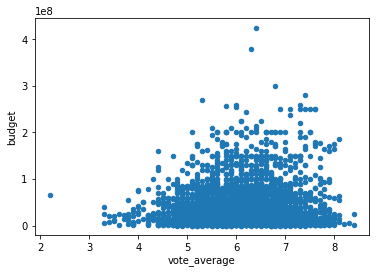

In [10]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.plot(x='vote_average', y='budget', kind='scatter');
# df.plot.line(x='vote_average', y='budget')

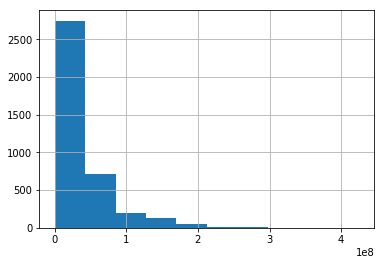

In [11]:
df['budget'].hist();



In [ ]:
df.plot(x='vote_average', y='budget_adj', kind='scatter');

In [ ]:
df.plot(x='budget', y='revenue', kind='scatter');

In [ ]:
df.plot(x='vote_average', y='revenue_adj', kind='scatter');

In [ ]:
plt.plot(['budget', 'budget_adj', 'revenue','revenue_adj'])
plt.ylabel('Vote Average')
plt.show()

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [ ]:
df.fare[died].mean()
df.Fare[survived].hist(alpha=0.5, bins=20, label='survived')
df.Fare[died].hist(alpha=0.5, bins=20, label='died')
plt.legend();

df.groupby('Pclass').Survived.mean().pot(kind='bar')

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])